In [51]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t, g = sy.symbols('t g')
m1, m2, m3 = sy.symbols('m_1 m_2 m_3')
l1, l2 = sy.symbols('L_1 L_2')
theta, phi, x = sy.symbols('theta phi x', cls=sy.Function)
th = theta(t)
ph = phi(t)
xt = x(t)

In [3]:
thdiff = sy.diff(th, t)
phdiff = sy.diff(ph, t)
thdiff_2 = sy.diff(thdiff, t)
phdiff_2 = sy.diff(phdiff, t)
xdiff = sy.diff(xt, t)
xdiff_2 = sy.diff(xdiff, t)
phdiff_2

Derivative(phi(t), (t, 2))

In [4]:
#Equações de posição
x1 = xt
x2 = xt + l1*sy.sin(th)
y2 = -l1*sy.cos(th)
x3 = x2 + l2*sy.sin(ph)
y3 = y2 - l2*sy.cos(ph)
y3

-L_1*cos(theta(t)) - L_2*cos(phi(t))

In [5]:
#Energia Cinética
T1 = 1/2 * m1 * sy.diff(x1, t)**2
T2 = 1/2 * m2 * (sy.diff(x2, t)**2 + sy.diff(y2, t)**2)
T3 = 1/2 * m3 * (sy.diff(x3, t)**2 + sy.diff(y3, t)**2)
T = T1 + T2 + T3
#Energia Potencial
U1 = m2 * g * y2
U2 = m3 * g * y3
U = U1 + U2
#Lagrangian
L = T - U
L

L_1*g*m_2*cos(theta(t)) - g*m_3*(-L_1*cos(theta(t)) - L_2*cos(phi(t))) + 0.5*m_1*Derivative(x(t), t)**2 + 0.5*m_2*(L_1**2*sin(theta(t))**2*Derivative(theta(t), t)**2 + (L_1*cos(theta(t))*Derivative(theta(t), t) + Derivative(x(t), t))**2) + 0.5*m_3*((L_1*sin(theta(t))*Derivative(theta(t), t) + L_2*sin(phi(t))*Derivative(phi(t), t))**2 + (L_1*cos(theta(t))*Derivative(theta(t), t) + L_2*cos(phi(t))*Derivative(phi(t), t) + Derivative(x(t), t))**2)

In [7]:
Leq1 = sy.diff(L, xt) - sy.diff(sy.diff(L, xdiff), t).simplify()
Leq2 = sy.diff(L, th) - sy.diff(sy.diff(L, thdiff), t).simplify()
Leq3 = sy.diff(L, ph) - sy.diff(sy.diff(L, phdiff), t).simplify()
Leq1

-1.0*m_1*Derivative(x(t), (t, 2)) - m_2*(-L_1*sin(theta(t))*Derivative(theta(t), t)**2 + L_1*cos(theta(t))*Derivative(theta(t), (t, 2)) + Derivative(x(t), (t, 2))) - m_3*(-L_1*sin(theta(t))*Derivative(theta(t), t)**2 + L_1*cos(theta(t))*Derivative(theta(t), (t, 2)) - L_2*sin(phi(t))*Derivative(phi(t), t)**2 + L_2*cos(phi(t))*Derivative(phi(t), (t, 2)) + Derivative(x(t), (t, 2)))

In [34]:
solvx = sy.solve([Leq1, Leq2], (xdiff_2, thdiff_2), rational=False)
solvx[thdiff_2] = solvx[thdiff_2].simplify()
solvx[xdiff_2] = solvx[xdiff_2].simplify()

In [35]:
nLeq3 = Leq3.subs({xdiff_2:solvx[xdiff_2]}).simplify()

In [36]:
phdiff_2new = sy.solve(nLeq3.subs(thdiff_2, solvx[thdiff_2]).simplify(), phdiff_2)[0]

In [37]:
xdiff_2new = solvx[xdiff_2].subs(phdiff_2, phdiff_2new)

In [40]:
thdiff_2new = solvx[thdiff_2].subs(phdiff_2, phdiff_2new)

In [55]:
phdiff_2new

m_1*(2.0*L_1*m_2*sin(phi(t) - theta(t))*Derivative(theta(t), t)**2 + 2.0*L_1*m_3*sin(phi(t) - theta(t))*Derivative(theta(t), t)**2 + L_2*m_3*sin(2.0*phi(t) - 2.0*theta(t))*Derivative(phi(t), t)**2 + g*m_2*sin(phi(t) - 2.0*theta(t)) + g*m_2*sin(phi(t)) + g*m_3*sin(phi(t) - 2.0*theta(t)) + g*m_3*sin(phi(t)))/(L_2*(-2.0*m_1*m_2 + m_1*m_3*cos(2.0*phi(t) - 2.0*theta(t)) - m_1*m_3 + m_2**2*cos(2.0*theta(t)) - m_2**2 + m_2*m_3*cos(2.0*theta(t)) - m_2*m_3))

In [45]:
#Recebendo valores numéricos
dz1dt_f = sy.lambdify((t, g, m1, m2, m3, l1, l2, x, th, ph, xdiff, thdiff, phdiff), xdiff_2new)
dz2dt_f = sy.lambdify((t, g, m1, m2, m3, l1, l2, x, th, ph, xdiff, thdiff, phdiff), thdiff_2new)
dz3dt_f = sy.lambdify((t, g, m1, m2, m3, l1, l2, x, th, ph, xdiff, thdiff, phdiff), phdiff_2new)
dxdt_f = sy.lambdify(xdiff, xdiff)
dth1dt_f = sy.lambdify(thdiff, thdiff) #Apenas uma função identidade
dth2dt_f = sy.lambdify(phdiff, phdiff)
dz1dt_f(2, 9.81, 1, 1, 1, 1, 1, 2, 4, 2, 2, 5, 3)

-8.511881624200793

In [49]:
def dSdt(S, t, g, m1, m2, m3, l1, l2):
    x, th, ph, z1, z2, z3 = S
    return [dxdt_f(z1), dz1dt_f(t, g, m1, m2, m3, l1, l2, x, th, ph, z1, z2, z3),
            dth1dt_f(z2), dz2dt_f(t, g, m1, m2, m3, l1, l2, x, th, ph, z1, z2, z3),
           dth2dt_f(z3), dz3dt_f(t, g, m1, m2, m3, l1, l2, x, th, ph, z1, z2, z3)]


In [50]:
from scipy.integrate import odeint
tl = np.linspace(0, 40, 1001)
g = 9.81
m1 = 1
m2 = 1
m3 = 2
l1 = 2
l2 = 1
x = 0
ans = odeint(dSdt, y0=[1, -3, -1, 5, 2, 3], t=tl, args=(g,m1,m2,m3,l1,l2))
tl[tl<1] #25 frames por segundo

C:\Users\skywa\anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96])

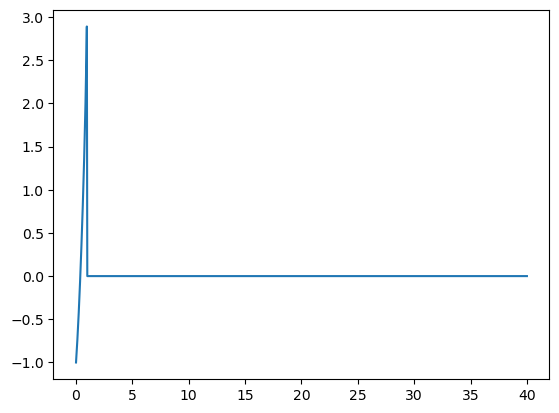

In [54]:
th1 = ans.T[0]
th2 = ans.T[2]
plt.plot(tl, th2)